## CREACION DEL MODELO

En este notebook presentaremos como creamos el modelo para la clasificación de frutas, utilizando una red neuronal convolucional.

Importaremos las libretas necesarias para el entrenamiento y futuro uso del modelo

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import os

In [2]:
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

El dataset utilizado para el entrenamiento del modelo se puede encontrar [Aquí](https://www.kaggle.com/datasets/moltean/fruits)

In [37]:
urltrain = 'C:/heregoesyourpath/fruits-360_dataset/fruits-360/Training'

Utilizamos la función `tf.keras.utils.image_dataset_from_directory` para cargar los datos de imágenes desde un directorio y crear un conjunto de datos en TensorFlow. Esta función es útil cuando se trabaja con un gran conjunto de imágenes organizadas en subdirectorios según las clases.

In [45]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    urltrain,
    validation_split = 0.2,
    subset = 'training',
    image_size = (100, 100),
    seed = 42,
    batch_size= 32
)

Found 67692 files belonging to 131 classes.
Using 54154 files for training.


In [48]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    urltrain,
    validation_split = 0.2,
    subset = 'validation',
    image_size = (100, 100),
    seed = 42,
    batch_size= 32
)

Found 22689 files belonging to 131 classes.
Using 4537 files for validation.


Aquí verificamos que los nombres de las clases sean correctos.

In [21]:
class_names = train_ds.class_names
print(class_names)

['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Beetroot', 'Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cauliflower', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Corn', 'Corn Husk', 'Cucumber Ripe', 'Cucumber Ripe 2', 'Dates', 'Eggplant', 'Fig', 'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 'Mango', 'Mango Red', 'Mangostan', 'Maracuja', 'Melo

In [22]:
class_names2 = val_ds.class_names
print(class_names2)

['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Beetroot', 'Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cauliflower', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Corn', 'Corn Husk', 'Cucumber Ripe', 'Cucumber Ripe 2', 'Dates', 'Eggplant', 'Fig', 'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 'Mango', 'Mango Red', 'Mangostan', 'Maracuja', 'Melo

In [23]:
%matplotlib inline

Visualizamos una previa de los datos del dataset, con su respectiva clase

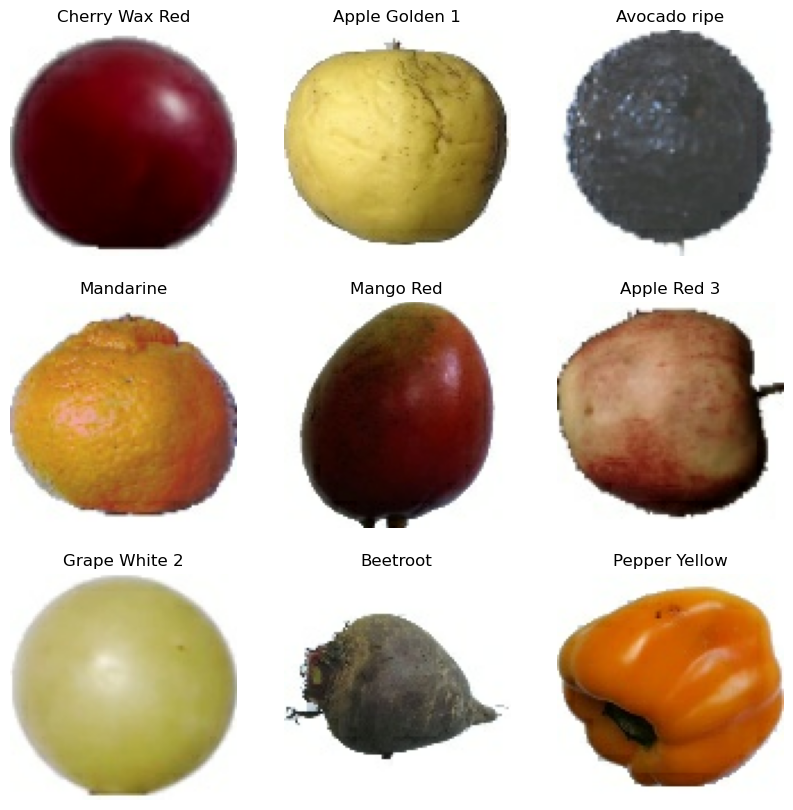

In [24]:
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

En nuestro flujo de trabajo con conjuntos de datos en TensorFlow, utilizamos `tf.data.AUTOTUNE` para aprovechar la capacidad de ajuste automático de rendimiento proporcionada por TensorFlow. Esta opción permite que TensorFlow tome decisiones dinámicas sobre la ejecución en tiempo real, lo que puede llevar a una mayor eficiencia y rendimiento.

In [39]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(buffer_size=32).prefetch(buffer_size=AUTOTUNE)

En nuestro proyecto, utilizamos el siguiente modelo de red neuronal convolucional

In [41]:
model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(100, 100, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

In [42]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 50, 50, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 25, 25, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 12, 12, 64)      

Una vez hecho el modelo y compilado, procedemos a entrenar el modelo

In [51]:
epochs=10
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs=epochs
)

Epoch 1/10
1693/1693 [==============================] - 146s 86ms/step - loss: 0.0487 - accuracy: 0.9907 - val_loss: 0.8388 - val_accuracy: 0.9032
Epoch 2/10
1693/1693 [==============================] - 161s 95ms/step - loss: 0.0750 - accuracy: 0.9887 - val_loss: 0.7729 - val_accuracy: 0.9295
Epoch 3/10
1693/1693 [==============================] - 168s 99ms/step - loss: 0.0663 - accuracy: 0.9913 - val_loss: 0.8713 - val_accuracy: 0.9381
Epoch 4/10
1693/1693 [==============================] - 169s 100ms/step - loss: 0.0676 - accuracy: 0.9913 - val_loss: 0.9992 - val_accuracy: 0.9420
Epoch 5/10
1693/1693 [==============================] - 170s 100ms/step - loss: 0.0800 - accuracy: 0.9921 - val_loss: 1.1298 - val_accuracy: 0.9301
Epoch 6/10
1693/1693 [==============================] - 167s 99ms/step - loss: 0.0665 - accuracy: 0.9929 - val_loss: 0.9536 - val_accuracy: 0.9462
Epoch 7/10
1693/1693 [==============================] - 164s 97ms/step - loss: 0.0860 - accuracy: 0.9926 - val_loss:

En caso de que se requiera, se puede instalar `pyyaml h5py` para el guardado del modelo, para así evitar problemas y facilitar su uso futuro

In [17]:
# %pip install pyyaml h5py  
# Required to save models in HDF5 format

Note: you may need to restart the kernel to use updated packages.


Visualizamos como fue la exactitud y la perdida conforme las epocas.

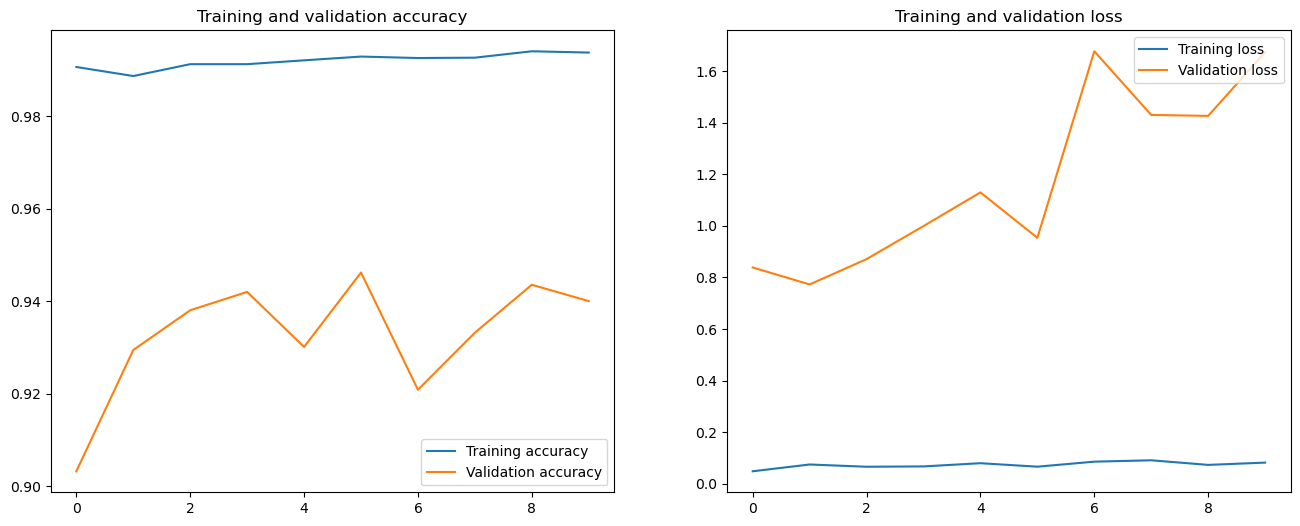

In [52]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training accuracy')
plt.plot(epochs_range, val_acc, label='Validation accuracy')
plt.legend(loc='lower right')
plt.title('Training and validation accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training loss')
plt.plot(epochs_range, val_loss, label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and validation loss')
plt.show()

In [62]:
model.save('modelfruit.h5') 

In [54]:
model = tf.keras.models.load_model('modelfruit.h5')

Para verificar nuestro modelo, lo probamos con el dataset ya hecho en el directorio `Test`

In [58]:
test_url = "C:/heregoesyourpath/fruits-360_dataset/fruits-360/Test/"

test_ds = tf.keras.utils.image_dataset_from_directory( 
    test_url, 
    seed = 42, 
    image_size=(100,100),
    shuffle=False #No shuffling for classification report
)

Found 22689 files belonging to 131 classes.


In [59]:
test_images, test_labels = tuple(zip(*test_ds))

predictions = model.predict(test_ds)
score = tf.nn.softmax(predictions)

710/710 [==============================] - 17s 24ms/step


In [60]:
results = model.evaluate(test_ds)
print("Test loss, test acc:", results)

710/710 [==============================] - 19s 26ms/step - loss: 1.8240 - accuracy: 0.9383
Test loss, test acc: [1.8240180015563965, 0.9382960796356201]


para convertir nuestro modelo y poder descargar los archivos resultantes, realizamos lo siguiente:

Instalamos la librería `tensorflowjs` para la conversión del modelo

In [32]:
#Para convertirlo a tensorflow.js, primero debemos instalar la libreria
%pip install tensorflowjs

^C
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\ProgramData\\Anaconda3\\envs\\AI\\Lib\\site-packages\\~ensorflow\\compiler\\tf2tensorrt\\_pywrap_py_utils.pyd'
Consider using the `--user` option or check the permissions.



     -------------------------------------- 85.1/85.1 kB 598.7 kB/s eta 0:00:00
  Using cached importlib_resources-5.12.0-py3-none-any.whl (36 kB)
     ---------------------------------------- 1.3/1.3 MB 4.8 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     -------------------------------------- 100.6/100.6 kB 6.0 MB/s eta 0:00:00
     ---------------------------------------- 85.1/85.1 kB 4.7 MB/s eta 0:00:00
     ---------------------------------------- 85.1/85.1 kB 5.0 MB/s eta 0:00:00
     ---------------------------------------- 85.1/85.1 kB ? eta 0:00:00
     ---------------------------------------- 84.5/84.5 kB 4.6 MB/s eta 0:00:00
     ---------------------------------------- 84.2/8

Creamos una carpeta llamada `output` donde se colocarán los archivos resultantes:

In [ ]:
%mkdir output

Realizamos la exportación del modelo a la carpeta de salida utilizando `tensorflowjs_converter`:
python

In [ ]:
!tensorflowjs_converter --input_format keras perros-gatos.h5 carpeta_salida

Confirmamos que se hayan generado los archivos en la carpeta de salida. Deben aparecer archivos "bin" y "json":

In [ ]:
!ls carpeta_salida

#Para descargarlos, da clic del lado izquierdo en el icono de la carpeta
#y expande carpeta_salida. En los archivos utiliza los 3 puntos para descargarlos

Una vez hecho todas estas instrucciones anteriores, ahora ejecutamos `pagina.py` para la visualización del funcionamiento de nuestra aplicación